In [1]:
from analysis_tools import Dataset, Process, Feature
from pprint import pprint

In [2]:
vbf_sm_process = Process("vbf_sm", "VBFSM", color=(0, 0, 0))
vbf = Dataset("vbf_sm",
             "/store/mc/RunIIAutumn18NanoAODv7/VBFHHTo2B2Tau_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/",
             vbf_sm_process,
             prefix="cmsxrootd-1.gridka.de:1094/")
pprint(vbf.get_files()[0:])

['/store/mc/RunIIAutumn18NanoAODv7/VBFHHTo2B2Tau_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/100000/3BDBE4D4-7D67-8642-A73D-EF42756D1880.root',
 '/store/mc/RunIIAutumn18NanoAODv7/VBFHHTo2B2Tau_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/100000/F0B36BCE-9E08-1848-9D32-4E5DD8176C21.root',
 '/store/mc/RunIIAutumn18NanoAODv7/VBFHHTo2B2Tau_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/110000/31F5979C-2686-5242-B388-92335EDF4E27.root',
 '/store/mc/RunIIAutumn18NanoAODv7/VBFHHTo2B2Tau_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/110000/E2C26867-6BDF-4B40-BC6C-3A1FE3835FB7.root',
 '/store/mc/RunIIAutumn18NanoAODv7/VBFHHTo2B2Tau_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8/NANOAODSIM/Nano02Apr2020_102X_

In [ ]:
# Create dy process and dataset (whose files are in desy, so we must use xrootd)
dy_process = Process("dy", "DY", color=(255, 0, 0))
d = Dataset("dy_low", 
            "/store/mc/RunIISummer16NanoAODv7/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext2-v1/110000/",
            dy_process,
            prefix="dcache-cms-xrootd.desy.de:1094/"
           )
# let's see which files we are considering
# don't forget to voms-proxy before!
pprint(d.get_files()[0:2])

In [3]:
# lets plot stuff using ROOT RDataFrame
import ROOT
if vbf.prefix:
    files = [("root://" + vbf.prefix + f) for f in vbf.get_files()[0:1]]
else:
    files = vbf.get_files()
print files
dataframe_files = ROOT.vector(str)()
for f in files:
    dataframe_files.push_back(f)
df = ROOT.RDataFrame("Events", dataframe_files)

Welcome to JupyROOT 6.18/04
['root://cmsxrootd-1.gridka.de:1094//store/mc/RunIIAutumn18NanoAODv7/VBFHHTo2B2Tau_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/100000/3BDBE4D4-7D67-8642-A73D-EF42756D1880.root']


In [11]:
print [col for col in df.GetColumnNames() if "ngen" in col.lower()]

['nGenJetAK8', 'nGenJet', 'nGenPart', 'nGenVisTau', 'nGenDressedLepton', 'nGenIsolatedPhoton']


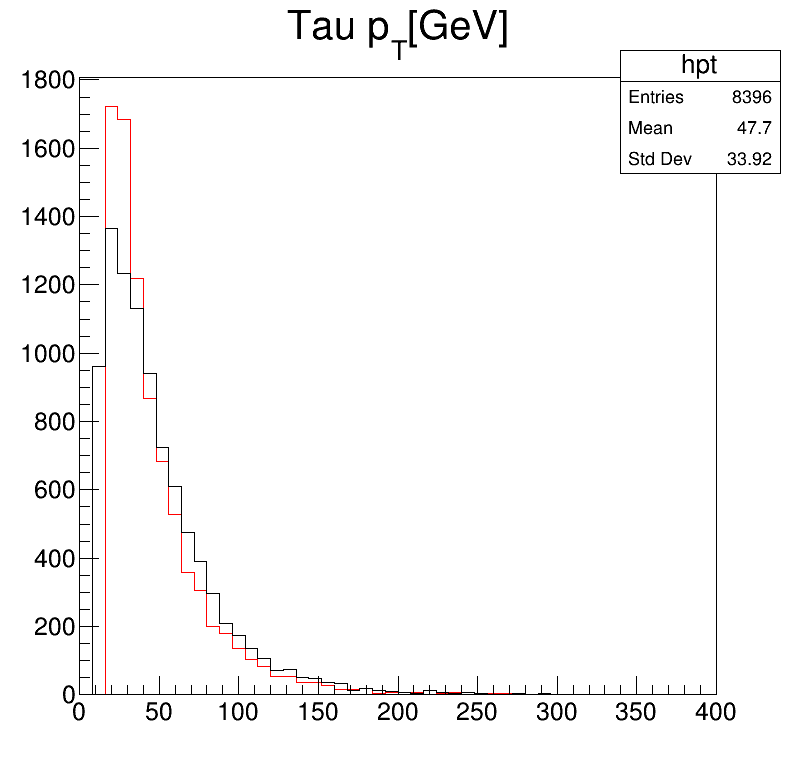

In [15]:
hmodel = ("hpt","Tau p_{T}[GeV]",50,0., 400.)
new_df = df.Filter("nGenVisTau >= 2")
f = Feature("GenVisTau_pt", "GenVisTau_pt")
f2 = Feature("Tau_pt", "Tau_pt")
hist = new_df.Histo1D(hmodel, f.expression)
hist2 = new_df.Histo1D(hmodel, f2.expression)


hist.SetLineColor(ROOT.TColor.GetColor(*vbf.process.color))
hist2.SetLineColor(ROOT.kRed)

c = ROOT.TCanvas("", "", 800, 800)
hist2.Draw("same")
hist.Draw("same")

c.Draw()

In [ ]:
f = Feature("met_pt", "MET_pt")
new_df = df.Filter("MET_pt > 90")
hist = new_df.Histo1D(f.expression)
hist.SetLineColor(ROOT.TColor.GetColor(*d.process.color))
c = ROOT.TCanvas("", "", 800, 800)
hist.Draw()
# c.Draw()
# new_df.Snapshot("Events", "skim.root")

In [ ]:
ROOT.gSystem.Load("../HHKinFit2/libHHKinFit2.so")
ROOT.gInterpreter.Declare('#include "/afs/cern.ch/work/j/jleonhol/private/cms_phys_ciemat/analysis_tools/HHKinFit2/interface/HHKinFitMasterHeavyHiggs.h"')


In [ ]:
c = ROOT.TCanvas("", "", 800, 800)

f = Feature("nfatjet", "nFatJet")
hist = df.Histo1D(f.expression)
# hist.Draw()

f2 = Feature("Muon_pt", "Muon_pt")
hist2 = df.Histo1D(f2.expression)

ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;      
    float pt_0(Vfloat pt, int n){
        if (n == 0) return -1.;
        else return pt[0];
    }
""")
hmodel = ("hpt","Muon p_{T}[GeV]",50,0., 200.)
muon_pt_0 = df.Define("Muon_pt_0", "pt_0(Muon_pt, nMuon)").Histo1D(hmodel,"Muon_pt_0")

hist2.Draw("same")
muon_pt_0.SetLineColor(ROOT.kRed)
muon_pt_0.Draw("same")


# # new_df = df.Filter("nMuon >= 1")
# # muon_charge_0 = new_df.Define("muon_charge_0", "Muon_charge[0]")
# # #f3 = Feature("Muon_charge", "Muon_charge[0]")
# hist3 = new_df.Histo1D(f3.expression)
# # hist3 = new_df.Histo1D("muon_charge_0")

# # hist2.Draw()
# hist3.SetLineColor(ROOT.kRed)
# hist3.Draw("same")
c.Draw()